In [1]:
from pyspark.sql import  SQLContext 
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
sc = SparkContext('local')
sqlctx = SQLContext(sc)

In [3]:
cardf = sqlctx.read.csv( 'data/cars.csv', header=True, inferSchema=True)
cardf.show()

+---+-----+----+
|_c0|speed|dist|
+---+-----+----+
|  1|    4|   2|
|  2|    4|  10|
|  3|    7|   4|
|  4|    7|  22|
|  5|    8|  16|
|  6|    9|  10|
|  7|   10|  18|
|  8|   10|  26|
|  9|   10|  34|
| 10|   11|  17|
| 11|   11|  28|
| 12|   12|  14|
| 13|   12|  20|
| 14|   12|  24|
| 15|   12|  28|
| 16|   13|  26|
| 17|   13|  34|
| 18|   13|  34|
| 19|   13|  46|
| 20|   14|  26|
+---+-----+----+
only showing top 20 rows



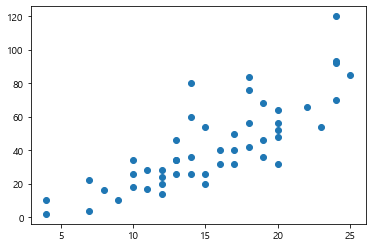

In [4]:
pdcar = cardf.toPandas()
plt.scatter(pdcar['speed'], pdcar['dist'])
plt.show()

In [5]:
cardf.corr('speed','dist')

0.8068949006892103

In [6]:
# x(speed) : 특성 데이터 (설명변수를 의미)의 개수에 따라 단순, 다중 선형회귀로 분류.
# y(dist: Label) : 정답

In [7]:
f = VectorAssembler(inputCols=['speed'], outputCol='features')
v_df = f.transform(cardf)
v_df.show(v_df.count())

+---+-----+----+--------+
|_c0|speed|dist|features|
+---+-----+----+--------+
|  1|    4|   2|   [4.0]|
|  2|    4|  10|   [4.0]|
|  3|    7|   4|   [7.0]|
|  4|    7|  22|   [7.0]|
|  5|    8|  16|   [8.0]|
|  6|    9|  10|   [9.0]|
|  7|   10|  18|  [10.0]|
|  8|   10|  26|  [10.0]|
|  9|   10|  34|  [10.0]|
| 10|   11|  17|  [11.0]|
| 11|   11|  28|  [11.0]|
| 12|   12|  14|  [12.0]|
| 13|   12|  20|  [12.0]|
| 14|   12|  24|  [12.0]|
| 15|   12|  28|  [12.0]|
| 16|   13|  26|  [13.0]|
| 17|   13|  34|  [13.0]|
| 18|   13|  34|  [13.0]|
| 19|   13|  46|  [13.0]|
| 20|   14|  26|  [14.0]|
| 21|   14|  36|  [14.0]|
| 22|   14|  60|  [14.0]|
| 23|   14|  80|  [14.0]|
| 24|   15|  20|  [15.0]|
| 25|   15|  26|  [15.0]|
| 26|   15|  54|  [15.0]|
| 27|   16|  32|  [16.0]|
| 28|   16|  40|  [16.0]|
| 29|   17|  32|  [17.0]|
| 30|   17|  40|  [17.0]|
| 31|   17|  50|  [17.0]|
| 32|   18|  42|  [18.0]|
| 33|   18|  56|  [18.0]|
| 34|   18|  76|  [18.0]|
| 35|   18|  84|  [18.0]|
| 36|   19| 

In [8]:
v_df = v_df.select('features', 'dist')
v_df.show()

+--------+----+
|features|dist|
+--------+----+
|   [4.0]|   2|
|   [4.0]|  10|
|   [7.0]|   4|
|   [7.0]|  22|
|   [8.0]|  16|
|   [9.0]|  10|
|  [10.0]|  18|
|  [10.0]|  26|
|  [10.0]|  34|
|  [11.0]|  17|
|  [11.0]|  28|
|  [12.0]|  14|
|  [12.0]|  20|
|  [12.0]|  24|
|  [12.0]|  28|
|  [13.0]|  26|
|  [13.0]|  34|
|  [13.0]|  34|
|  [13.0]|  46|
|  [14.0]|  26|
+--------+----+
only showing top 20 rows



In [9]:
# train data
# test data
train_df, test_df = v_df.randomSplit([0.7, 0.3])

In [10]:
train_df.show()
print(train_df.count())

+--------+----+
|features|dist|
+--------+----+
|   [4.0]|   2|
|   [7.0]|  22|
|  [10.0]|  18|
|  [10.0]|  26|
|  [10.0]|  34|
|  [11.0]|  28|
|  [12.0]|  28|
|  [13.0]|  26|
|  [13.0]|  34|
|  [13.0]|  46|
|  [14.0]|  26|
|  [14.0]|  60|
|  [15.0]|  20|
|  [15.0]|  54|
|  [16.0]|  32|
|  [16.0]|  40|
|  [17.0]|  32|
|  [17.0]|  40|
|  [17.0]|  50|
|  [18.0]|  56|
+--------+----+
only showing top 20 rows

34


In [11]:
test_df.show()
print(test_df.count())

+--------+----+
|features|dist|
+--------+----+
|   [4.0]|  10|
|   [7.0]|   4|
|   [8.0]|  16|
|   [9.0]|  10|
|  [11.0]|  17|
|  [12.0]|  14|
|  [12.0]|  20|
|  [12.0]|  24|
|  [13.0]|  34|
|  [14.0]|  36|
|  [14.0]|  80|
|  [15.0]|  26|
|  [18.0]|  42|
|  [18.0]|  84|
|  [20.0]|  56|
|  [24.0]|  93|
+--------+----+

16


In [12]:
lr = LinearRegression( featuresCol='features',labelCol='dist', maxIter=100, regParam=0.01)
lr_model = lr.fit(train_df)    # 학습 시작

In [13]:
print("기울기", lr_model.coefficients)
print('절편', lr_model.intercept)

기울기 [3.7127838427805973]
절편 -14.483710826892757


In [14]:
w = lr_model.coefficients[0]
b = lr_model.intercept
p = b + w*15
p

41.2080468148162

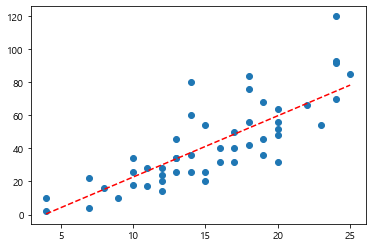

In [15]:
pdcar = cardf.toPandas()
pdcar['lr'] = w*pdcar['speed']+ b
plt.scatter(pdcar['speed'], pdcar['dist'])
plt.plot(pdcar['speed'], pdcar['lr'], 'r--')
plt.show()